# Командный проект

## Оптимизация списков клиентов на коммуникацию на основе транзакционной истории

### Участники: Баранова Валерия, Жужгова Юлия, Ильясова Сабина

#### Часть 1: Обработка и исследование исходных данных

привет!
안녕하세요!
Исәнмесез!
hello!

Для начала импортируем необходимые для работы библиотеки и загрузим исходный датасет.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.options.display.max_rows = 85

cwd = os.getcwd()

Выведем первые пять строк наших данных, чтобы получить первичное представление об их структуре. Например, теперь мы знаем, что датесет train содержит 22 столбца, каждый из которых представляет собой переменные, по строкам размещены наблюдения - данные по клиенту, имеющему индивидуальный ID. В том числе в датасет train входят две целевые переменные - Target1 и Target2.

In [ ]:
df_train = pd.read_csv('WORK_bank_data_train.csv', sep=';')
df_train.head()

,ID,Age,Ind_Household,Age_group,District,Region,Lifetime,Income,Segment,Ind_deposit,...,Ind_salary,trans_6_month,trans_9_month,trans_12_month,amont_trans,amont_day_from,trans_3_month,Gender,Target1,Target2
0,1200000001,51.0,No,middle,02,Midlands,3.0,53,Platinum,No,...,No,2026.27,2964.23,4140.91,3,21,910.02,F,No,No
1,1200000002,47.0,No,middle,34,Midlands,2.0,51,Gold,No,...,No,2033.14,2969.30,4202.63,5,14,977.80,U,No,No
2,1200000003,45.0,No,middle,17,North,6.0,50,Silver,No,...,No,2085.68,3080.13,4277.45,11,16,1001.54,M,No,No
3,1200000004,78.0,No,senior,49,Midlands,12.0,52,Platinum,Yes,...,No,2026.58,3001.34,4105.54,3,15,980.78,F,No,No
4,1200000005,57.0,No,middle,19,South East,8.0,52,Silver,Yes,...,No,2142.23,3188.19,4401.98,2,26,1003.68,F,Yes,No


In [ ]:
df_test = pd.read_csv('WORK_WORK_BANK_DATA_test_sample.csv', sep=';')
df_test.head()

,ID,Age,Ind_House_hold,Age_group,District,Region,Lifetime,Income,Segment,Ind_deposit,Ind_salary,trans_6_month,trans_9_month,trans_12_month,amont_trans,amont_day_from,trans_3_month,Gender
0,1200000027,50.0,No,middle,22,South East,5.0,47,Tin,Yes,No,2062.32,2978.92,4054.13,7,17,950.45,M
1,1200000040,34.0,No,middle,47,South East,5.0,54,Tin,No,No,2000.73,3111.23,4265.02,5,17,982.29,F
2,1200000041,NaN,Yes,unknown,14,South East,28.0,52,Gold,Yes,No,1991.05,2990.26,4193.14,9,33,909.27,F
3,1200000071,61.0,No,senior,23,Midlands,3.0,54,Silver,Yes,No,2094.12,3089.97,4167.11,5,17,933.91,F
4,1200000080,44.0,No,middle,51,North,8.0,43,Silver,Yes,No,2034.41,2972.27,4165.87,5,17,917.13,F


In [ ]:
for column_train in df_train.columns:
    was = False
    for column_test in df_test.columns:
        if column_train == column_test:
            was = True
    if not was:
        print(column_train)

Ind_Household
Ind_email
Ind_phone
Target1
Target2


В двух датасетах есть одна и та же переменная, но с разными названиями, исправим это.

In [ ]:
df_test.rename(columns = {'Ind_House_hold' : 'Ind_Household'}, inplace = True)

In [ ]:
for column_train in df_train.columns:
    was = False
    for column_test in df_test.columns:
        if column_train == column_test:
            was = True
    if not was:
        print(column_train)

Ind_email
Ind_phone
Target1
Target2


Датасет test содержит в себе 18 переменных, а не 22 как df_train, так как в нем отсутствуют две зависимые переменные и две переменные - Индикатор наличия e-mail и телефона Ind_email и Ind_phone. Удалим эти две переменные, так как их использование для построения моделей будет невозможно.

In [ ]:
df_train.drop(columns = ['Ind_email', 'Ind_phone'], inplace = True)

Далее пока что будем работать только с датасетом train, так как именно он будет необходим для построения моделей, датасет test преобразуем позже.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985477 entries, 0 to 985476
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              985477 non-null  int64  
 1   Age             918519 non-null  float64
 2   Ind_Household   985477 non-null  object 
 3   Age_group       985477 non-null  object 
 4   District        985477 non-null  object 
 5   Region          985477 non-null  object 
 6   Lifetime        972869 non-null  float64
 7   Income          985477 non-null  int64  
 8   Segment         985477 non-null  object 
 9   Ind_deposit     985477 non-null  object 
 10  Ind_salary      985477 non-null  object 
 11  trans_6_month   985477 non-null  float64
 12  trans_9_month   985477 non-null  float64
 13  trans_12_month  985477 non-null  float64
 14  amont_trans     985477 non-null  int64  
 15  amont_day_from  985477 non-null  int64  
 16  trans_3_month   985477 non-null  float64
 17  Gender    

Команда info() позволяет узнать количество всех наблюдений, ненулевых значений по каждой переменной и ее тип. По результатам видно, что всего наблюдений в датасете 985477, однако в данных по переменным Age и Lifetime много пропущенных значений. Типы данных по нашей таблице: числовые (int, float) и категориальные (object). При этом категориальных переменных больше, чем числовых показателей.
Типы всех переменных установлены верно, дополнительных корректировок не требуется.

Далее составим таблицу, содержащую статистические характеристики переменных, а именно: количество ненулевых значений, среднее, ско, минимум и максимум, медиану (50% квантиль), квантили 25% и 75%. Также нам необходимо ислледовать данные на количество уникальных значений, пустых значений и долю от общего количесвта в процентах. Добавим к описательной таблице соответствующие столбцы.

In [ ]:
profile_num = pd.DataFrame(df_train.describe().transpose())
unique = []
for i in df_train.columns:
    if df_train[i].dtypes != 'object':
        unique.append(df_train[i].nunique())
profile_num['unique'] = unique
all = [df_train.shape[0]] * profile_num.shape[0]
profile_num['percentage_unique'] = profile_num['unique'] / profile_num['count'] *100
profile_num['null'] = all - profile_num['count']
profile_num['percentage_null'] = profile_num['null'] / df_train.shape[0] *100
profile_num

,count,mean,std,min,25%,50%,75%,max,unique,percentage_unique,null,percentage_null
ID,985477.0,1.200524e+09,302714.432408,1.200000e+09,1.200262e+09,1.200524e+09,1.200786e+09,1.201049e+09,985477,100.000000,0.0,0.000000
Age,918519.0,5.379211e+01,13.196993,1.800000e+01,4.400000e+01,5.400000e+01,6.400000e+01,7.900000e+01,62,0.006750,66958.0,6.794476
Lifetime,972869.0,6.562314e+00,4.655215,0.000000e+00,4.000000e+00,5.000000e+00,8.000000e+00,3.900000e+01,39,0.004009,12608.0,1.279380
Income,985477.0,5.035613e+01,5.440736,2.500000e+01,4.700000e+01,5.000000e+01,5.400000e+01,7.500000e+01,51,0.005175,0.0,0.000000
trans_6_month,985477.0,2.049943e+03,70.712709,1.668770e+03,2.002260e+03,2.050020e+03,2.097610e+03,2.370870e+03,42505,4.313140,0.0,0.000000
trans_9_month,985477.0,3.069965e+03,86.610431,2.624090e+03,3.011540e+03,3.069910e+03,3.128470e+03,3.468300e+03,50868,5.161764,0.0,0.000000
trans_12_month,985477.0,4.189979e+03,100.020678,3.698920e+03,4.122480e+03,4.190000e+03,4.257490e+03,4.684880e+03,57702,5.855236,0.0,0.000000
amont_trans,985477.0,7.240207e+00,3.034947,1.000000e+00,5.000000e+00,7.000000e+00,9.000000e+00,4.900000e+01,44,0.004465,0.0,0.000000
amont_day_from,985477.0,1.974189e+01,7.014321,1.000000e+01,1.500000e+01,1.600000e+01,2.500000e+01,4.200000e+01,31,0.003146,0.0,0.000000
trans_3_month,985477.0,9.525142e+02,48.247139,7.164900e+02,9.205200e+02,9.520200e+02,9.845300e+02,1.174030e+03,65926,6.689755,0.0,0.000000


Теперь составим аналогичную таблицу для категориальных переменных, добавим столбцы с расчетом пустых значений, а также долей уникальных и пустых наблюдений.

In [ ]:
profile_cat = df_train.describe(include = 'object').transpose()
all1 = [df_train.shape[0]] * profile_cat.shape[0]
profile_cat['percentage_unique'] = profile_cat['unique'] / profile_cat['count'] *100
profile_cat['null'] = all1 - profile_cat['count']
profile_cat['percentage_null'] = profile_cat['null'] / 10243 *100
profile_cat

,count,unique,top,freq,percentage_unique,null,percentage_null
Ind_Household,985477,2,No,640250,0.000203,0,0.0
Age_group,985477,4,middle,578936,0.000406,0,0.0
District,985477,56,52,53206,0.005683,0,0.0
Region,985477,6,South East,382905,0.000609,0,0.0
Segment,985477,4,Silver,379739,0.000406,0,0.0
Ind_deposit,985477,2,Yes,797999,0.000203,0,0.0
Ind_salary,985477,2,No,916207,0.000203,0,0.0
Gender,985477,3,F,538741,0.000304,0,0.0
Target1,985477,2,No,741971,0.000203,0,0.0
Target2,985477,2,No,901093,0.000203,0,0.0


Далее построим распределения для переменных.



In [ ]:
def build_displots(data, columns, n_col=1, name='displots'):
    m = n_col
    n = (len(columns) + m - 1) // m
    fig, axes = plt.subplots(n, m, figsize=(20, n * (16 // m)))
    fig.suptitle(name)
    fig.tight_layout(pad=3.0)
    for idx in range(len(columns)):
        cur_data = data[~data[columns[idx]].isna()][columns[idx]]
        i, j = idx // m, idx % m
        # try:
        #     try:
        #         sns_plot = sns.distplot(cur_data, ax=axes[i, j], color='blue')
        #     except:
        #         sns_plot = sns.distplot(cur_data, ax=axes[i, j], kde_kws={'bw': 0.1}, color='red')
        # except:
        sns_plot = cur_data.hist(ax=axes[i, j], color='green')
        axes[i, j].set_title(columns[idx])
    plt.show()
    return

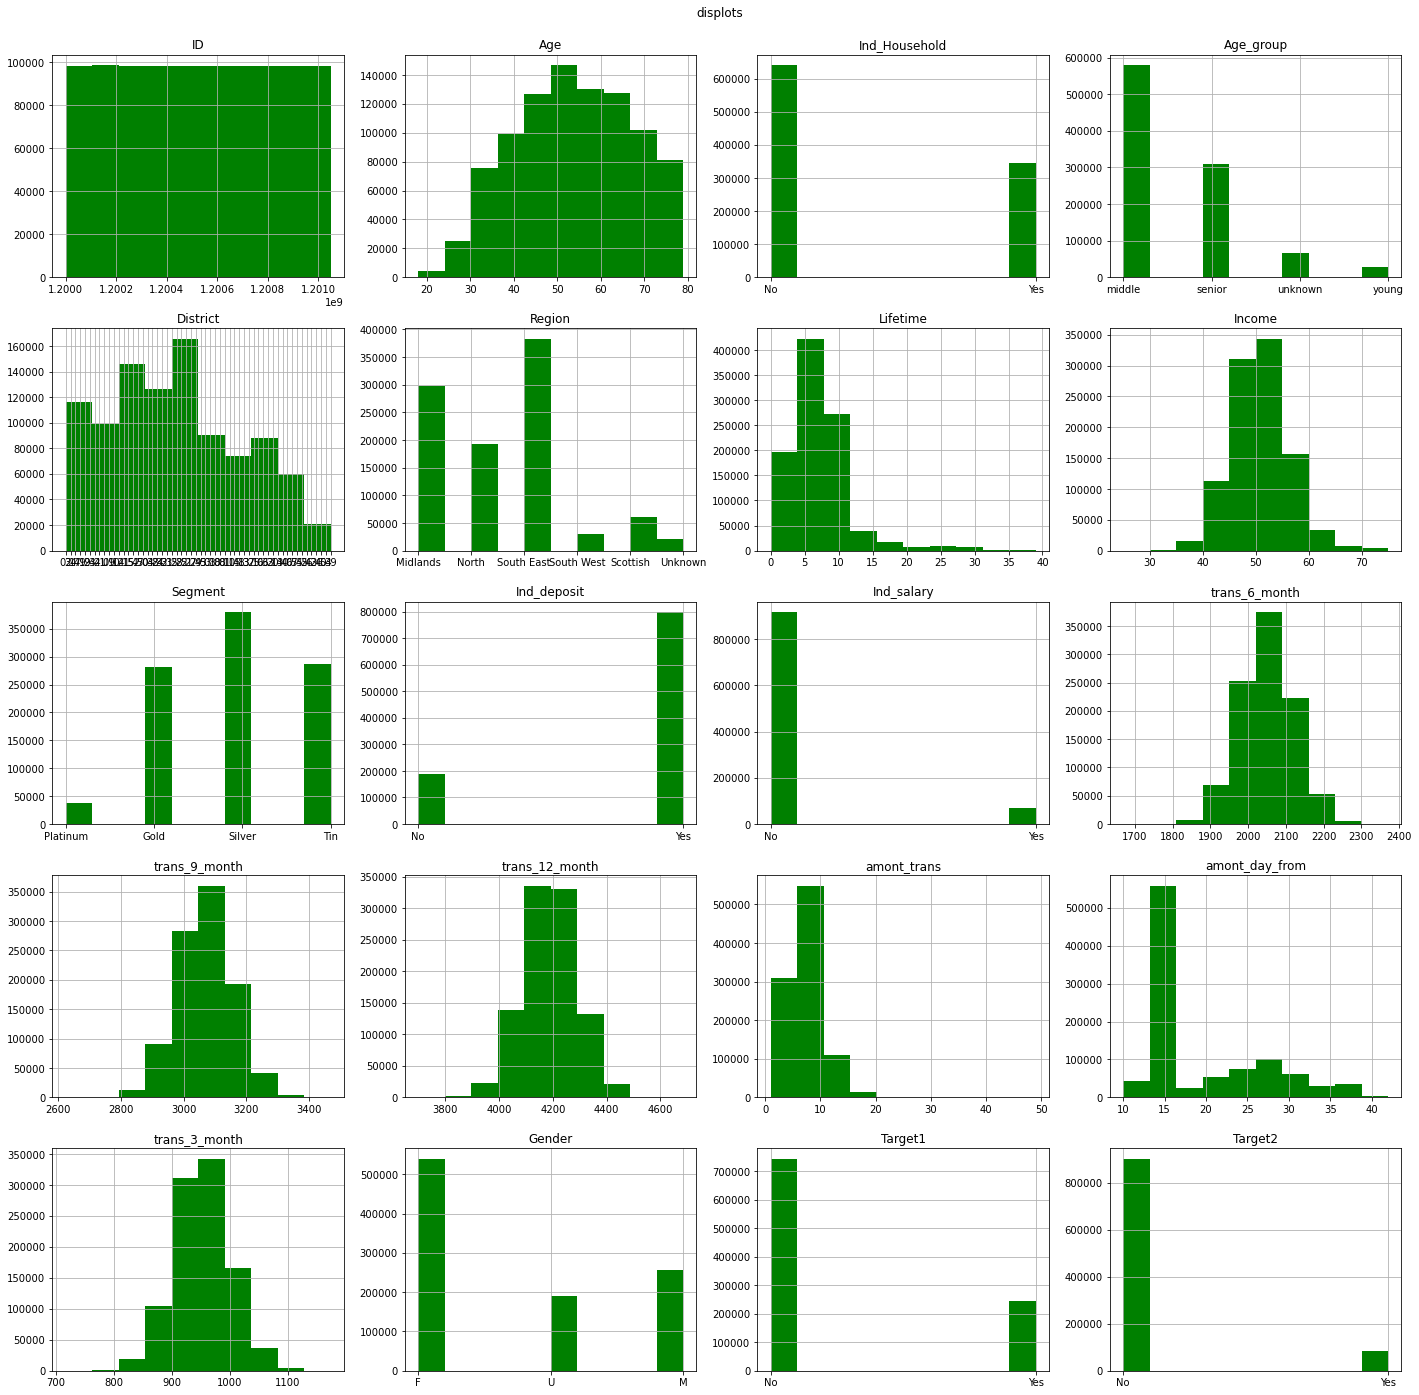

In [ ]:
build_displots(df_train, columns=df_train.columns, n_col=4, name='displots')

Построим матрицу корреляций для датасета train.

In [ ]:
num_features = profile_num.transpose().columns.tolist()
del num_features[0]

<AxesSubplot:>

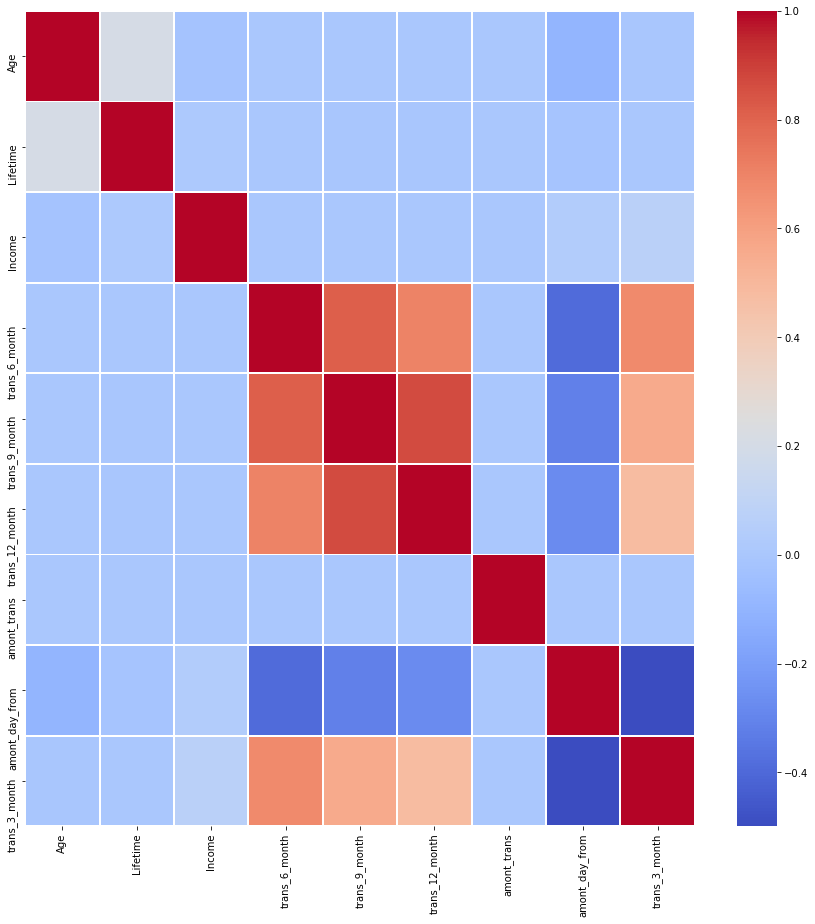

In [ ]:
corr_matrix = df_train.loc[:,num_features].corr()
corr_matrix
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, cmap = 'coolwarm',  linewidths=1, linecolor='white')

По матрице корреляций видно, что наиболее коррелирующими переменными являются trans_6_month с trans_9_month и trans_9_month с trans_12_month, они связаны положительно, но есть и отрицательно зависящие друг от друга переменные - это trans_3_month и amount_day_from. Эти переменные коррелированы, вероятно, потому что они основаны друг на друге, то есть транзакции за последние 12 месяцев включают в себя транзакции за последние 9 месяцев. При дальнейшем анализе некоторые коррелированные переменные будут удалены.

Заменим пустые значения в переменной Age, для этого воспользуемся вспомогательной переменной Age_group.

In [ ]:
for age_group in df_train['Age_group'].unique():
    print('group:', age_group)
    print('count:', df_train[df_train['Age_group'] == age_group].shape[0])
    print('nan: ', df_train[df_train['Age_group'] == age_group]['Age'].isna().sum(), ' (',
          round(df_train[df_train['Age_group'] == age_group]['Age'].isna().sum() / 
                df_train[df_train['Age_group'] == age_group].shape[0] * 100, 2), '%)', sep='')
    print('displot: ', df_train[df_train['Age_group'] == age_group]['Age'].min(), '-', 
          df_train[df_train['Age_group'] == age_group]['Age'].max())
    print('-' * 10)

group: middle
count: 578936
nan: 0 (0.0%)
displot:  31.0 - 60.0
----------
group: senior
count: 310393
nan: 0 (0.0%)
displot:  61.0 - 79.0
----------
group: unknown
count: 66958
nan: 66958 (100.0%)
displot:  nan - nan
----------
group: young
count: 29190
nan: 0 (0.0%)
displot:  18.0 - 30.0
----------


Видно, что все пропущенные значения содержатся в категории unknown, остальные пользователи разделены на три возрастных группы: с 18 до 30, с 31 до 60 и с 61 до 79. Так как у нас больше нет никаких дополнительных данных, заменим пропуски для категории unknown на средний возраст (округлим его до целого) всех клиентов.

In [ ]:
df_train['Age'].fillna(round(df_train['Age'].mean(), 0), inplace=True)

Теперь займемся заменой пропусков в переменной Lifetime - это переменная, которая обозначает время проведенное с банком, то есть то, как долго клиент им пользуется. Для этого нам пригодятся данные по транзакциям, так как они есть во временном разрезе, что поможет нам установить примерное время присоединения клиента. Но для начала проверим правильность данных по транзакциям.

Период 1 - с 12 до 9 месяца, период 2 - с 9 до 6, период 3 - с 6 по 3 месяц, период 4 - последние 3 месяца.

In [ ]:
df_transactions = pd.DataFrame()
df_transactions['trans_period1'] = df_train['trans_12_month'] - df_train['trans_9_month']
df_transactions['trans_period2'] = df_train['trans_9_month'] - df_train['trans_6_month']
df_transactions['trans_period3'] = df_train['trans_6_month'] - df_train['trans_3_month']
df_transactions['trans_period4'] = df_train['trans_3_month']

In [ ]:
trans_cols = ['trans_period1', 'trans_period2', 'trans_period3', 'trans_period4']

In [ ]:
df_transactions[trans_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
trans_period1,985477.0,1120.014865,50.002544,869.600000,1086.33,1120.07,1153.76,1364.66
trans_period2,985477.0,1020.021823,50.008094,779.020000,986.31,1020.06,1053.69,1285.73
trans_period3,985477.0,1097.428477,51.783570,803.242469,1063.38,1098.22,1132.37,1363.54
trans_period4,985477.0,952.514236,48.247139,716.490000,920.52,952.02,984.53,1174.03


По этой таблице для транзакций за промежутки между имеющимися периодами видно, что минимальные значения не отрицательны и не равны нулю, это значит, что данные правильные, так как у нас нет клиентов, для которых число транзакций за последние 9 месяцев больше, чем за последние 12 месяцев. Также нет клиентов, которые совсем не совершали транзакции в указанный период. Заменим пропуски на средние значения.

In [ ]:
df_train['Lifetime'].fillna(round(df_train['Lifetime'].mean(), 0), inplace=True)

Также заметим, что переменная District в USA обозначает название районов Америки (всего их в наших данных 55), которые могут быть объединены в регионы. Также в выборке есть переменная Regions, которая обозначает разделение клиентов по географическому признаку - то есть, более крупным округам, в которые входят дистрикты. Поэтому, чтобы избежать повторений, уберем более мелкую географическую единицу, то есть переменную District.

In [ ]:
df_train.drop("District", axis=1, inplace=True)
df_train

,ID,Age,Ind_Household,Age_group,Region,Lifetime,Income,Segment,Ind_deposit,Ind_salary,trans_6_month,trans_9_month,trans_12_month,amont_trans,amont_day_from,trans_3_month,Gender,Target1,Target2
0,1200000001,51.0,No,middle,Midlands,3.0,53,Platinum,No,No,2026.27,2964.23,4140.91,3,21,910.02,F,No,No
1,1200000002,47.0,No,middle,Midlands,2.0,51,Gold,No,No,2033.14,2969.30,4202.63,5,14,977.80,U,No,No
2,1200000003,45.0,No,middle,North,6.0,50,Silver,No,No,2085.68,3080.13,4277.45,11,16,1001.54,M,No,No
3,1200000004,78.0,No,senior,Midlands,12.0,52,Platinum,Yes,No,2026.58,3001.34,4105.54,3,15,980.78,F,No,No
4,1200000005,57.0,No,middle,South East,8.0,52,Silver,Yes,No,2142.23,3188.19,4401.98,2,26,1003.68,F,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985472,1201048571,54.0,No,unknown,South East,6.0,42,Silver,Yes,No,2139.03,3155.41,4291.97,10,14,989.90,F,No,No
985473,1201048572,63.0,No,senior,South East,9.0,51,Tin,No,No,1916.91,3000.02,4045.15,11,30,884.63,F,No,No
985474,1201048573,68.0,No,senior,North,3.0,56,Gold,Yes,No,2053.00,3112.87,4292.20,8,16,922.66,M,No,No
985475,1201048574,45.0,No,middle,Midlands,1.0,54,Gold,Yes,No,2082.85,3143.77,4207.48,8,15,951.42,M,No,No


#### Часть 2: преобразование WOE и расчет Information Value

Запишем сначала функцию преобразования WOE.

In [ ]:
# преобразование WOE
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

Далее необходимо разделить числовые переменные на бины.

In [ ]:
for feature in num_features:
    df_train[feature + '_bin'] = pd.qcut(df_train[feature], 5, duplicates='drop')

Заменим значения Target1 и Target2 на 1 и 0.

In [ ]:
def code(data, columns):
    for column in columns:
        data[column] = 1 * (data[column] == 'Yes')
    return data

In [ ]:
df_train = code(df_train, columns=['Target1', "Target2"])

Ниже представлены расчеты Information Value для Target1 сначала для чиловых, а затем для категориальных переменных.

In [ ]:
#для числовых
feature_IV_num_1 = pd.DataFrame({'feature': [], 'IV': []})
for feature in num_features:
    
    df, iv = calculate_woe_iv(df_train, feature + '_bin', 'Target1')
    df['feature'] = feature
    df_train_target1 = df_train.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    df_train_target1 = df_train_target1.rename(columns={'WoE':'WoE'+'_'+feature})
    
    df_train_target1 = df_train_target1.drop(columns = [feature, feature + '_bin', 'Value'])
    
    dict_to_append = {'feature': feature, 'IV': iv}
    feature_IV_num_1 = feature_IV_num_1.append(dict_to_append, ignore_index=True)
print(feature_IV_num_1.sort_values(by=['IV'], ascending = False))    

          feature        IV
7  amont_day_from  1.472283
0             Age  0.593544
2          Income  0.049649
1        Lifetime  0.020579
8   trans_3_month  0.000903
4   trans_9_month  0.000044
3   trans_6_month  0.000025
5  trans_12_month  0.000012
6     amont_trans  0.000003


In [ ]:
cat_features = ()
cat_features = ['Ind_Household', 'Age_group', 'Region', 
                            'Segment', 'Ind_deposit', 'Ind_salary', 'Gender']

In [ ]:
#для категориальных
feature_IV_cat_1 = pd.DataFrame({'feature': [], 'IV': []})
for feature in cat_features:
    df, iv = calculate_woe_iv(df_train, feature , 'Target1')
    df['feature'] = feature
    df_train_target1 = df_train.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    df_train_target1 = df_train_target1.rename(columns={'WoE':'WoE'+'_'+feature})
    df_train_target1 = df_train_target1.drop(columns = [feature, 'Value'])
        
    dict_to_append = {'feature': feature, 'IV': iv}
    feature_IV_cat_1 = feature_IV_cat_1.append(dict_to_append, ignore_index=True)
print(feature_IV_cat_1.sort_values(by=['IV'], ascending = False))

         feature            IV
6         Gender  4.311562e-01
1      Age_group  1.938650e-01
3        Segment  6.917546e-02
2         Region  2.083547e-03
4    Ind_deposit  1.325528e-05
5     Ind_salary  7.740557e-06
0  Ind_Household  7.693461e-07


Теперь рассчитаем Information Value по числовым и категориальным переменным по Target2.

In [ ]:
#для числовых
feature_IV_num_2 = pd.DataFrame({'feature': [], 'IV': []})
for feature in num_features:
    
    df, iv = calculate_woe_iv(df_train, feature + '_bin', 'Target2')
    df['feature'] = feature
    df_train_target2 = df_train.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    df_train_target2 = df_train_target2.rename(columns={'WoE':'WoE'+'_'+feature})
    
    df_train_target2 = df_train_target2.drop(columns = [feature, feature + '_bin', 'Value'])
    
    dict_to_append = {'feature': feature, 'IV': iv}
    feature_IV_num_2 = feature_IV_num_2.append(dict_to_append, ignore_index=True)
print(feature_IV_num_2.sort_values(by=['IV'], ascending = False))

          feature        IV
7  amont_day_from  1.303512
0             Age  0.366998
2          Income  0.034911
1        Lifetime  0.014678
8   trans_3_month  0.014486
3   trans_6_month  0.001787
4   trans_9_month  0.001265
5  trans_12_month  0.001029
6     amont_trans  0.000011


In [ ]:
#для категориальных
feature_IV_cat_2 = pd.DataFrame({'feature': [], 'IV': []})
for feature in cat_features:
    df, iv = calculate_woe_iv(df_train, feature , 'Target2')
    df['feature'] = feature
    df_train_target2 = df_train.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    df_train_target2 = df_train_target2.rename(columns={'WoE':'WoE'+'_'+feature})
    df_train_target2 = df_train_target2.drop(columns = [feature, 'Value'])
        
    dict_to_append = {'feature': feature, 'IV': iv}
    feature_IV_cat_2 = feature_IV_cat_2.append(dict_to_append, ignore_index=True)
print(feature_IV_cat_2.sort_values(by=['IV'], ascending = False))

         feature        IV
6         Gender  0.301045
1      Age_group  0.130817
3        Segment  0.046705
2         Region  0.001400
4    Ind_deposit  0.000025
5     Ind_salary  0.000022
0  Ind_Household  0.000006


Уберем переменные, у которых IV меньше, чем *0.01* (они почти одинаковы для обоих таргетов)

In [ ]:
df_train_final = df_train.drop(columns=["trans_6_month", "trans_9_month", "trans_12_month", 
                                             "amont_trans", "trans_3_month", "Ind_Household", "Ind_deposit", "Ind_salary"])

Так как в датасет добавились переменные с бинами, дропнем их из каждой выборки.

In [ ]:
df_train_final.columns

Index(['ID', 'Age', 'Age_group', 'Region', 'Lifetime', 'Income', 'Segment',
       'amont_day_from', 'Gender', 'Target1', 'Target2', 'Age_bin',
       'Lifetime_bin', 'Income_bin', 'trans_6_month_bin', 'trans_9_month_bin',
       'trans_12_month_bin', 'amont_trans_bin', 'amont_day_from_bin',
       'trans_3_month_bin'],
      dtype='object')

In [ ]:
df_train_final.drop(columns=["Age_bin", "Lifetime_bin", "Income_bin", "trans_6_month_bin", 
                                  "trans_9_month_bin", "trans_12_month_bin", "amont_trans_bin", 
                             "trans_3_month_bin", "amont_day_from_bin"], inplace=True)

In [ ]:
df_train_final.columns

Index(['ID', 'Age', 'Age_group', 'Region', 'Lifetime', 'Income', 'Segment',
       'amont_day_from', 'Gender', 'Target1', 'Target2'],
      dtype='object')

#### Часть 3: Кодировка данных

Сначала поработаем с категориальными переменными, которые принимают больше двух значений, для этого воспользуемся методом One Hot Encoding.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
def encoder(data, columns):
    for column in columns:
        tmp = pd.get_dummies(data[column], prefix=column)
        data = data.drop(columns=[column])
        data = data.join(tmp)
    return data

In [ ]:
df_train_final = encoder(df_train_final, columns=['Age_group', 'Region', 'Segment', 'Gender'])

Уберем переменные со значения Unknown

In [ ]:
df_train_final.drop(columns=["Region_Unknown", "Age_group_unknown", "Gender_U"], inplace=True)

#### Часть 4: Обработка и исследование данных test

Теперь займемся датасетом test, сначала рассмотрим пропущенные значения.

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63098 entries, 0 to 63097
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              63098 non-null  int64  
 1   Age             58729 non-null  float64
 2   Ind_Household   63098 non-null  object 
 3   Age_group       63098 non-null  object 
 4   District        63098 non-null  object 
 5   Region          63098 non-null  object 
 6   Lifetime        62311 non-null  float64
 7   Income          63098 non-null  int64  
 8   Segment         63098 non-null  object 
 9   Ind_deposit     63098 non-null  object 
 10  Ind_salary      63098 non-null  object 
 11  trans_6_month   63098 non-null  float64
 12  trans_9_month   63098 non-null  float64
 13  trans_12_month  63098 non-null  float64
 14  amont_trans     63098 non-null  int64  
 15  amont_day_from  63098 non-null  int64  
 16  trans_3_month   63098 non-null  float64
 17  Gender          63098 non-null 

По результатам видно, что всего наблюдений в датасете 63098, однако в данных по переменным Age и Lifetime немного пропущенных значений. Типы данных по нашей таблице: числовые (int, float) и категориальные (object). При этом категориальных переменных больше, чем числовых показателей. Типы всех переменных установлены верно, дополнительных корректировок не требуется.

Теперь составим таблицу с описанием данных.

In [ ]:
profile_num_test = pd.DataFrame(df_test.describe().transpose())
unique = []
for i in df_test.columns:
    if df_test[i].dtypes != 'object':
        unique.append(df_test[i].nunique())
profile_num_test['unique'] = unique
all_test = [df_test.shape[0]] * profile_num_test.shape[0]
profile_num_test['percentage_unique'] = profile_num_test['unique'] / profile_num_test['count'] *100
profile_num_test['null'] = all_test - profile_num_test['count']
profile_num_test['percentage_null'] = profile_num_test['null'] / df_test.shape[0] *100
profile_num_test

,count,mean,std,min,25%,50%,75%,max,unique,percentage_unique,null,percentage_null
ID,63098.0,1.200525e+09,302436.599309,1.200000e+09,1.200264e+09,1.200526e+09,1.200787e+09,1.201049e+09,63098,100.000000,0.0,0.000000
Age,58729.0,5.380413e+01,13.227846,1.800000e+01,4.400000e+01,5.400000e+01,6.400000e+01,7.900000e+01,62,0.105570,4369.0,6.924150
Lifetime,62311.0,6.583364e+00,4.714597,0.000000e+00,4.000000e+00,5.000000e+00,8.000000e+00,3.900000e+01,39,0.062589,787.0,1.247266
Income,63098.0,5.033686e+01,5.484858,2.800000e+01,4.700000e+01,5.000000e+01,5.400000e+01,7.500000e+01,47,0.074487,0.0,0.000000
trans_6_month,63098.0,2.050644e+03,70.398695,1.756490e+03,2.002803e+03,2.050300e+03,2.098110e+03,2.363480e+03,25355,40.183524,0.0,0.000000
trans_9_month,63098.0,3.070887e+03,86.455787,2.689650e+03,3.012162e+03,3.070750e+03,3.129270e+03,3.468720e+03,28748,45.560874,0.0,0.000000
trans_12_month,63098.0,4.191012e+03,99.970075,3.764060e+03,4.123413e+03,4.190575e+03,4.258388e+03,4.613460e+03,31176,49.408856,0.0,0.000000
amont_trans,63098.0,7.246125e+00,3.044539,1.000000e+00,5.000000e+00,7.000000e+00,9.000000e+00,4.000000e+01,35,0.055469,0.0,0.000000
amont_day_from,63098.0,2.094459e+01,6.895973,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,3.300000e+01,2,0.003170,0.0,0.000000
trans_3_month,63098.0,9.528664e+02,47.760230,7.424300e+02,9.216500e+02,9.521700e+02,9.843641e+02,1.177530e+03,21510,34.089829,0.0,0.000000


In [ ]:
profile_cat_test = df_test.describe(include = 'object').transpose()
all1_test = [df_test.shape[0]] * profile_cat_test.shape[0]
profile_cat_test['percentage_unique'] = profile_cat_test['unique'] / profile_cat_test['count'] *100
profile_cat_test['null'] = all1_test - profile_cat_test['count']
profile_cat_test['percentage_null'] = profile_cat_test['null'] / 10243 *100
profile_cat_test

,count,unique,top,freq,percentage_unique,null,percentage_null
Ind_Household,63098,2,No,40960,0.00317,0,0.0
Age_group,63098,4,middle,36939,0.006339,0,0.0
District,63098,56,52,3430,0.088751,0,0.0
Region,63098,6,South East,24490,0.009509,0,0.0
Segment,63098,4,Silver,24262,0.006339,0,0.0
Ind_deposit,63098,2,Yes,51151,0.00317,0,0.0
Ind_salary,63098,2,No,58608,0.00317,0,0.0
Gender,63098,3,F,34397,0.004755,0,0.0


Строим распределения для переменных.

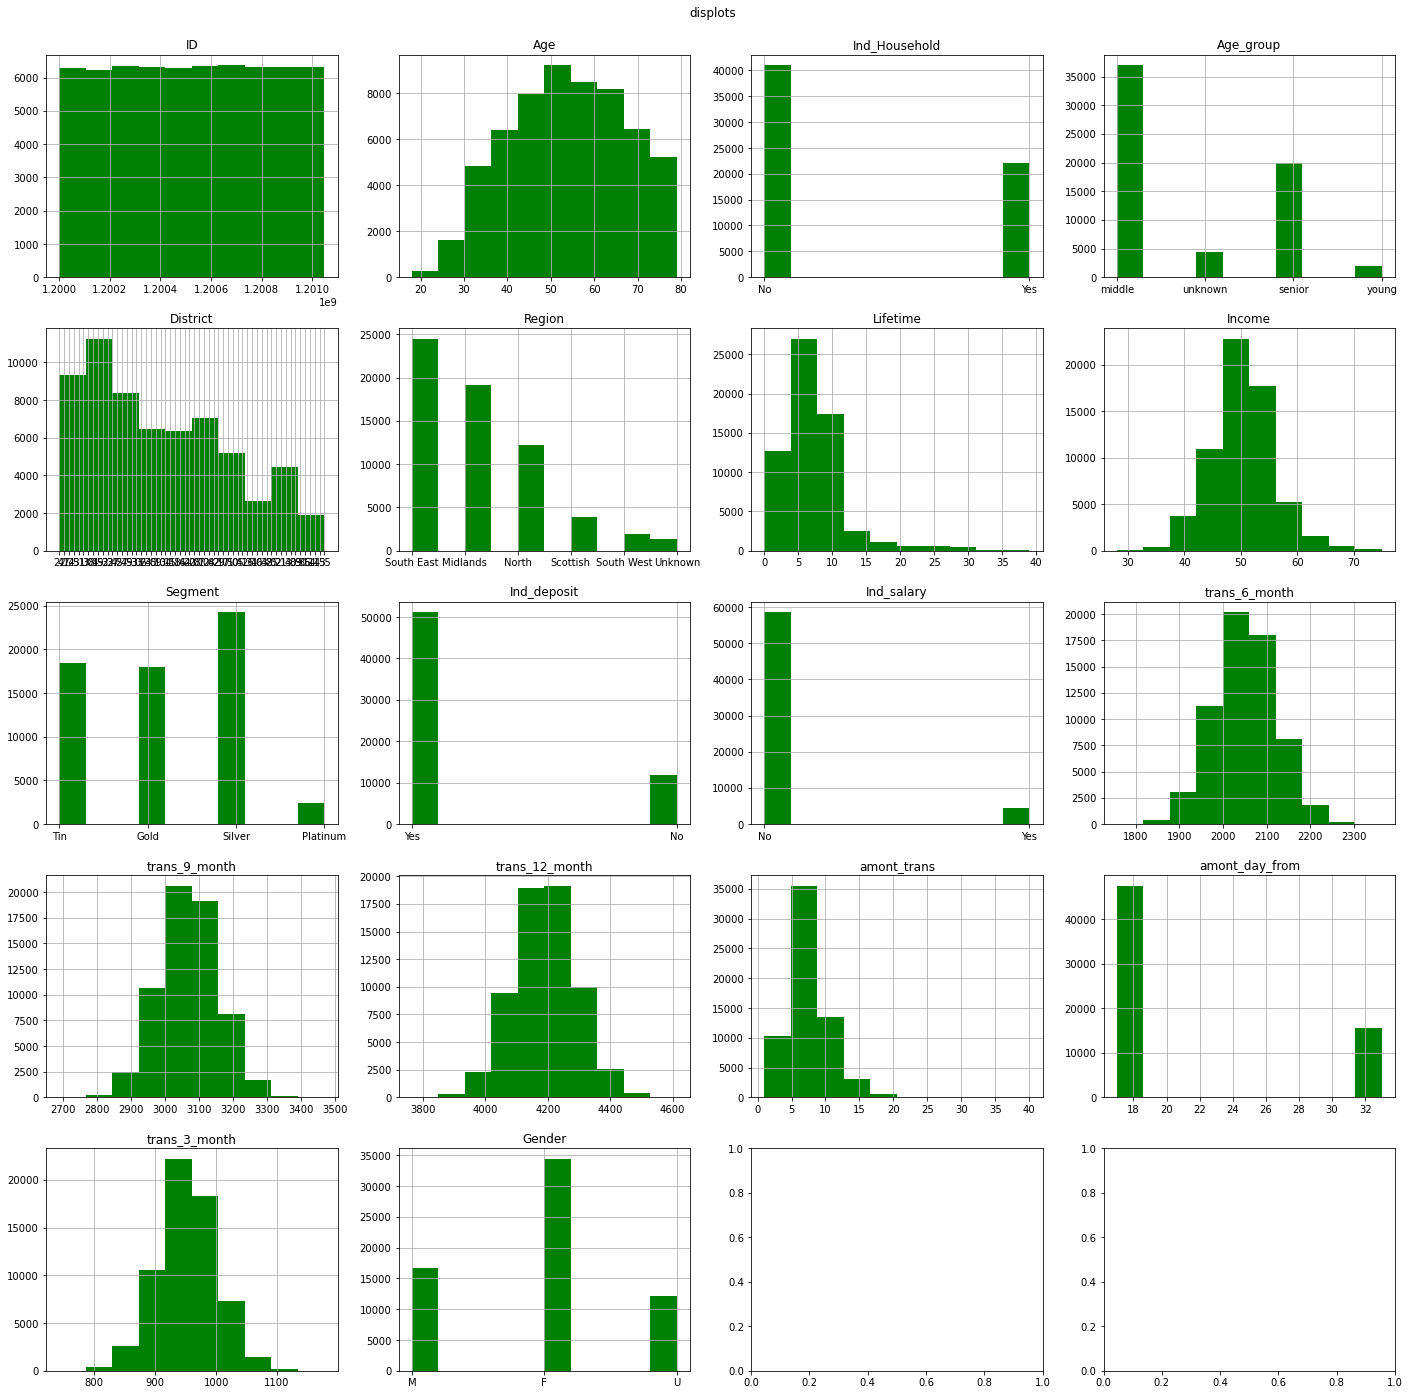

In [ ]:
build_displots(df_test, columns=df_test.columns, n_col=4, name='displots')

Построим матрицу корреляций для датасета test.

In [ ]:
num_features_test = profile_num_test.transpose().columns.tolist()
del num_features_test[0]

<AxesSubplot:>

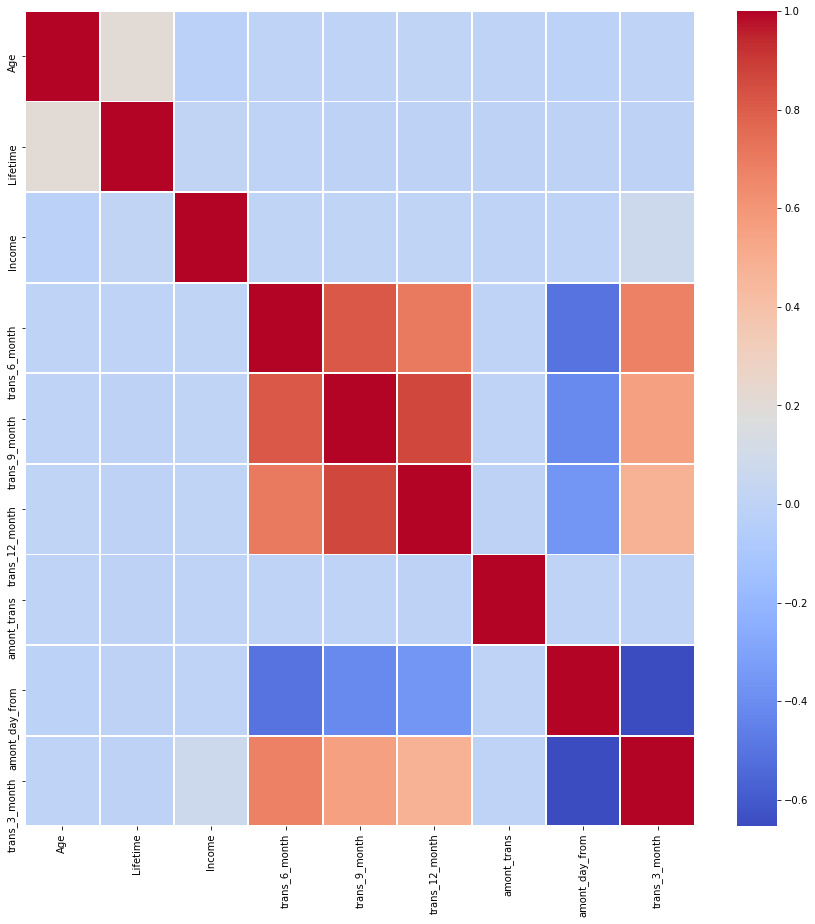

In [ ]:
corr_matrix = df_test.loc[:,num_features_test].corr()
corr_matrix
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, cmap = 'coolwarm',  linewidths=1, linecolor='white')

Заменим пропущенные значения для переменных Age и Lifetime.

In [ ]:
df_test['Age'].fillna(round(df_test['Age'].mean(), 0), inplace=True)

Для замены пропусков в переменной Lifetime сначала проверим правильность данных по транзакциям в тестовой выборке.
Период 1 - с 12 до 9 месяца, период 2 - с 9 до 6, период 3 - с 6 по 3 месяц, период 4 - последние 3 месяца.

In [ ]:
df_trans_test = pd.DataFrame()
df_trans_test['trans_period1'] = df_test['trans_12_month'] - df_test['trans_9_month']
df_trans_test['trans_period2'] = df_test['trans_9_month'] - df_test['trans_6_month']
df_trans_test['trans_period3'] = df_test['trans_6_month'] - df_test['trans_3_month']
df_trans_test['trans_period4'] = df_test['trans_3_month']

In [ ]:
df_trans_test[trans_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
trans_period1,63098.0,1120.125686,50.156083,899.940000,1086.47,1120.28,1154.057500,1322.17
trans_period2,63098.0,1020.242958,49.942582,804.480000,986.37,1020.18,1053.920000,1219.08
trans_period3,63098.0,1097.777263,51.635079,825.926355,1063.92,1098.15,1132.990000,1298.60
trans_period4,63098.0,952.866352,47.760230,742.430000,921.65,952.17,984.364112,1177.53


По этой таблице для транзакций за промежутки между имеющимися периодами видно, что минимальные значения не отрицательны и не равны нулю, это значит, что данные правильные, так как у нас нет клиентов, для которых число транзакций за последние 9 месяцев больше, чем за последние 12 месяцев. Также нет клиентов, которые совсем не совершали транзакции в указанный период. Заменим пропуски на средние значения.

In [ ]:
df_test['Lifetime'].fillna(round(df_test['Lifetime'].mean(), 0), inplace=True)

Уберем колонки, которые мы убирали в тренировочной выборке после рассчета IV.

In [ ]:
df_test.drop(columns=["Ind_Household", "District", "Ind_deposit", "Ind_salary",
                      "trans_6_month", "trans_9_month", "trans_12_month", "amont_trans",
                      "trans_3_month"], inplace=True)

С помощью функции из предыдущего пункта переведем категориальные переменные в числовые.

In [ ]:
df_test_final = encoder(df_test, columns=['Age_group', 'Region', 'Segment', 'Gender'])

Также, как и в тренировочной выборке, уберем колонки со значением Unknown.

In [ ]:
df_test_final.drop(columns=["Region_Unknown", "Gender_U", "Age_group_unknown"], inplace=True)

In [ ]:
df_test_final.columns

Index(['ID', 'Age', 'Lifetime', 'Income', 'amont_day_from', 'Age_group_middle',
       'Age_group_senior', 'Age_group_young', 'Region_Midlands',
       'Region_North', 'Region_Scottish', 'Region_South East',
       'Region_South West', 'Segment_Gold', 'Segment_Platinum',
       'Segment_Silver', 'Segment_Tin', 'Gender_F', 'Gender_M'],
      dtype='object')

In [ ]:
df_train_final.columns

Index(['ID', 'Age', 'Lifetime', 'Income', 'amont_day_from', 'Target1',
       'Target2', 'Age_group_middle', 'Age_group_senior', 'Age_group_young',
       'Region_Midlands', 'Region_North', 'Region_Scottish',
       'Region_South East', 'Region_South West', 'Segment_Gold',
       'Segment_Platinum', 'Segment_Silver', 'Segment_Tin', 'Gender_F',
       'Gender_M'],
      dtype='object')

In [ ]:
for column_train in df_train_final.columns:
    was = False
    for column_test in df_test_final.columns:
        if column_train == column_test:
            was = True
    if not was:
        print(column_train)

Target1
Target2


Кодировка данных завершена.